In [1]:
# Vamos a usar herramientas de visualización para hacer análisis exploratorio de datos 
# sobre un dataset de corredores de una maratón.

# Para esto vamos a usar los principales tipos de gráficos de la biblioteca seaborn

In [2]:
# Hola! Soy Juanma. Analizaremos un dataset que contiene información de los resultados de una maratón. 
# La información está desagregada para cada corredor.

# Los campos que contiene son:

# 1. age
# 2. gender
# 3. split: tiempo que tardó en correr la primera mitad de la maratón
# 4. final: tiempo que tardó en correr la maratón completa

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data_location = "../Data/marathon.csv"
data = pd.read_csv(data_location)
data.head()

,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59


In [4]:
data.dtypes

age        int64
gender    object
split     object
final     object
dtype: object

In [5]:
# Vamos a convertir ahora los datos de las columnas split y final en tipo TimeDelta

# TimeDelta representa una duración de tiempo, es decir la diferencia de tiempo que hay entre dos fechas o tiempos

In [6]:
# Vamos a definir la función convert_time que recibe un string y devuelve una instancia de TimeDelta

# Y usando apply vamos a convertir en TimeDelta cada valor de las columnas split y final

# Vamos a guardar el resultado de convertir estas columnas en las columnas split_timedelta y final_timedelta

# Como último paso veamos de qué tipo son las columnas nuevas del DataFrame

In [7]:
def convert_time(s):
        parts = s.split(':')
        if len(parts) == 3:
            horas = int(parts[0])
            minutos = int(parts[1])
            segundos = int(parts[2])
            result = pd.Timedelta(hours=horas, minutes=minutos, seconds=segundos)
        else:
            # creo un Timedelta de cero:
            result = pd.Timedelta(hours=0, minutes=0, seconds=0)
        return result   

In [8]:
data['split_timedelta'] = data['split'].apply(convert_time)
# veo qué hizo:
data['split_timedelta'].head(4)

0   0 days 01:05:38
1   0 days 01:06:26
2   0 days 01:06:49
3   0 days 01:06:16
Name: split_timedelta, dtype: timedelta64[ns]

In [9]:
data['final_timedelta'] = data['final'].apply(convert_time)
# veo qué hizo:
data['final_timedelta'].head(4)

0   0 days 02:08:51
1   0 days 02:09:28
2   0 days 02:10:42
3   0 days 02:13:45
Name: final_timedelta, dtype: timedelta64[ns]

In [10]:
data.dtypes

age                          int64
gender                      object
split                       object
final                       object
split_timedelta    timedelta64[ns]
final_timedelta    timedelta64[ns]
dtype: object

In [11]:
# Al castear instancias de TimeDelta a int obtenemos un valor expresado en nanosegundos, 
# la mínima unidad que se encuentra representada en un timedelta.

# Ahora queremos crear columnas con los tiempos de split y final expresados en segundos.
# Vamos a llamar a esas nuevas columnas split_sec y final_sec

In [12]:
data['split_sec'] = data['split_timedelta'].astype(np.int64) / 1E9
data['final_sec'] = data['final_timedelta'].astype(np.int64) / 1E9
data.head()

,age,gender,split,final,split_timedelta,final_timedelta,split_sec,final_sec
0,33,M,01:05:38,02:08:51,0 days 01:05:38,0 days 02:08:51,3938.0,7731.0
1,32,M,01:06:26,02:09:28,0 days 01:06:26,0 days 02:09:28,3986.0,7768.0
2,31,M,01:06:49,02:10:42,0 days 01:06:49,0 days 02:10:42,4009.0,7842.0
3,38,M,01:06:16,02:13:45,0 days 01:06:16,0 days 02:13:45,3976.0,8025.0
4,31,M,01:06:32,02:13:59,0 days 01:06:32,0 days 02:13:59,3992.0,8039.0


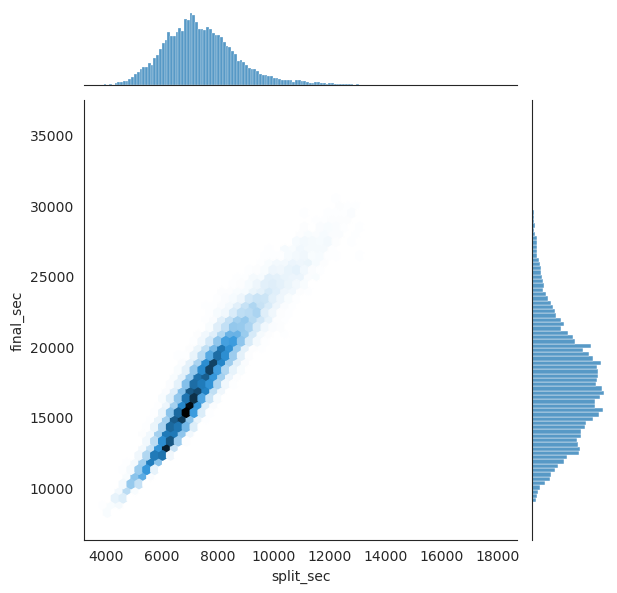

In [13]:
# Veamos la relación entre split_sec y final_sec con un jointplot

%matplotlib inline
with sns.axes_style('white'):
    g = sns.jointplot(x = "split_sec", y = "final_sec", data = data, kind='hex')

In [14]:
# Los corredores se dividen en dos: los que corren más rápido la primera mitad que la segunda y viceversa.

# Creamos una nueva columna para visualizar esta relación:

# data['split_frac'] = 1 - 2 * data['split_sec'] / data['final_sec']

In [15]:
# Si data['split_sec'] es menor que la mitad de data['final_sec'], 
# entonces el corredor corre más rápido la primera mitad de la carrera y data['split_frac'] es mayor que cero.

# Si data['split_sec'] es mayor que la mitad de data['final_sec'], 
# entonces el corredor corre más lento la primera mitad de la carrera y data['split_frac'] es menor que cero.

# Si data['split_sec'] es igual a la mitad de data['final_sec'], 
# entonces el corredor corre con igual velocidad la primera y la segunda mitad de la carrera y data['split_frac'] es cero.

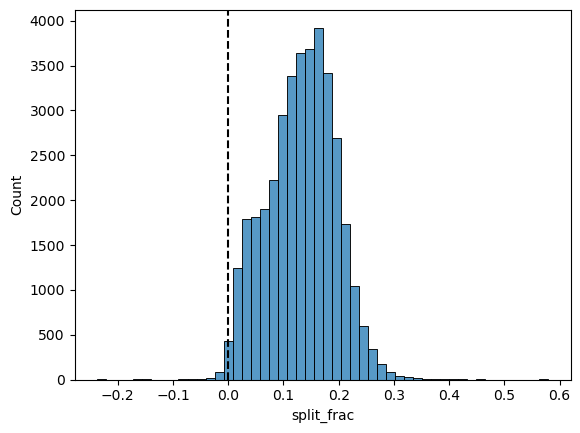

In [16]:
# Visualicemos la distribución de esta nueva variable, 
# usando distplot y dibujando una línea en el eje vertical que separe los valores menores y mayores que cero.

data['split_frac'] = 1 - 2 * data['split_sec'] / data['final_sec']
sns.histplot(data['split_frac'], stat = 'count', bins = 50, kde = False)
plt.axvline(0, color="k", linestyle="--");

In [17]:
# ¿Cuántos corredores fueron más lento en la primera mitad?

sum(data.split_frac < 0)

251

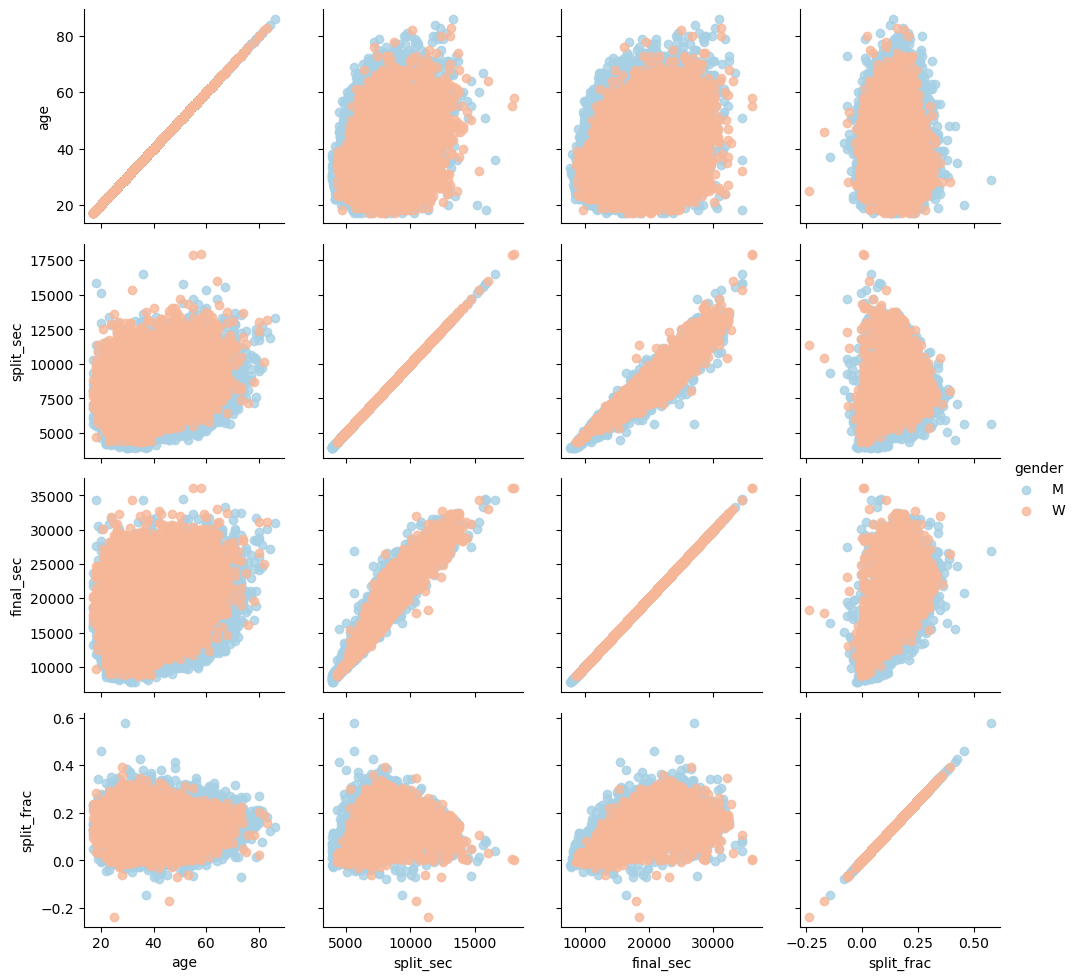

In [18]:
# ¿Existe alguna correlación entre los valores de las columnas 'age', 'split_sec', 'final_sec', 'split_frac'?
# Para eso vamos a usar PairGrid

g = sns.PairGrid(data, vars=['age', 'split_sec', 'final_sec', 'split_frac'],
                 hue='gender', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend();

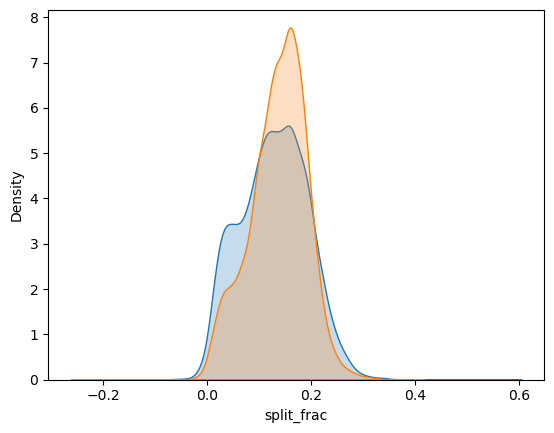

In [19]:
# Veamos ahora superpuestas las distribuciones de los valores de la columna split_frac para hombres y mujeres.

# Usemos para esto kdeplot

data_men = data.split_frac[data.gender=='M']
data_women = data.split_frac[data.gender=='W']
sns.kdeplot(data_men, label='men', shade=True)
sns.kdeplot(data_women, label='women', shade=True)
plt.xlabel('split_frac');

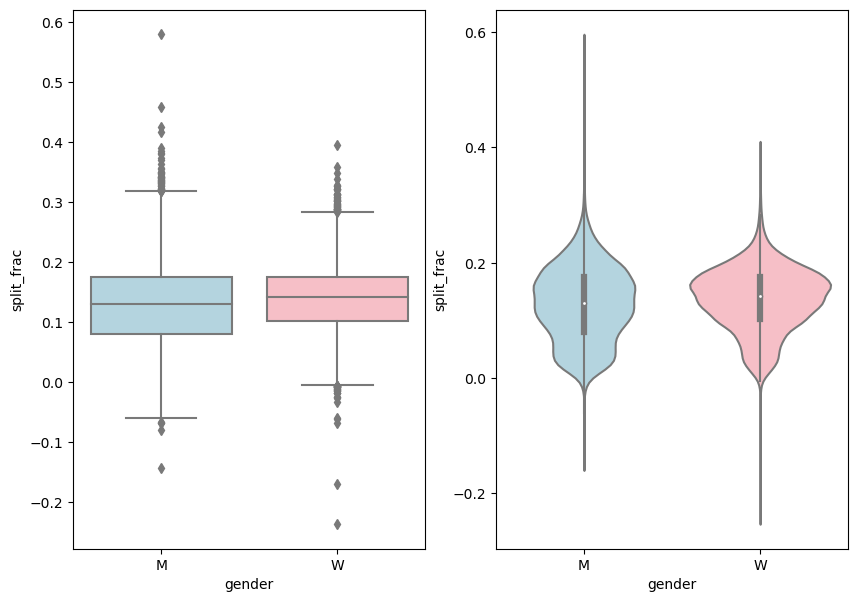

In [20]:
# Comparemos ambas distribuciones usando un boxplot y un violinplot

fig, axs = plt.subplots(ncols=2, figsize=(10,7))

sns.boxplot(x = "gender", y = "split_frac", data=data,
               palette=["lightblue", "lightpink"], ax=axs[0])
sns.violinplot(x = "gender", y = "split_frac", data=data,
               palette=["lightblue", "lightpink"], ax=axs[1]);

In [21]:
# Generemos violinplots para la distribución de valores del campo edad.

# Comencemos creando una nueva columna (age_dec) que especifique la década de edad de cada corredor 
# (aquellos que están en "los '30", en "los '40", ...) y grafiquemos la distribución de los valores de age_dec

In [22]:
data['age_dec'] = data.age.apply(lambda age: 10 * (age // 10))
data.head()

,age,gender,split,final,split_timedelta,final_timedelta,split_sec,final_sec,split_frac,age_dec
0,33,M,01:05:38,02:08:51,0 days 01:05:38,0 days 02:08:51,3938.0,7731.0,-0.018756,30
1,32,M,01:06:26,02:09:28,0 days 01:06:26,0 days 02:09:28,3986.0,7768.0,-0.026262,30
2,31,M,01:06:49,02:10:42,0 days 01:06:49,0 days 02:10:42,4009.0,7842.0,-0.022443,30
3,38,M,01:06:16,02:13:45,0 days 01:06:16,0 days 02:13:45,3976.0,8025.0,0.009097,30
4,31,M,01:06:32,02:13:59,0 days 01:06:32,0 days 02:13:59,3992.0,8039.0,0.006842,30


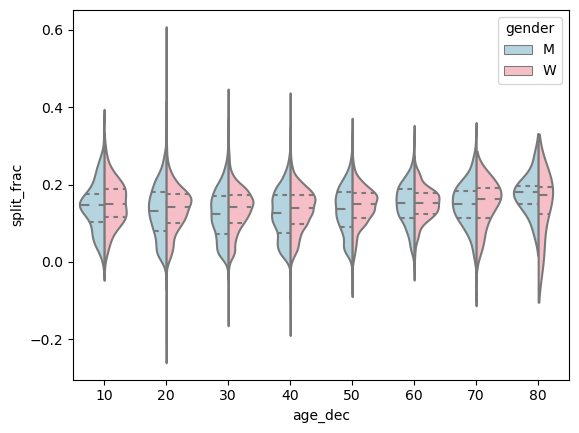

In [23]:
sns.violinplot(x = "age_dec", y = "split_frac", hue="gender", data=data,
                   split=True, inner="quartile",
                   palette=["lightblue", "lightpink"]);

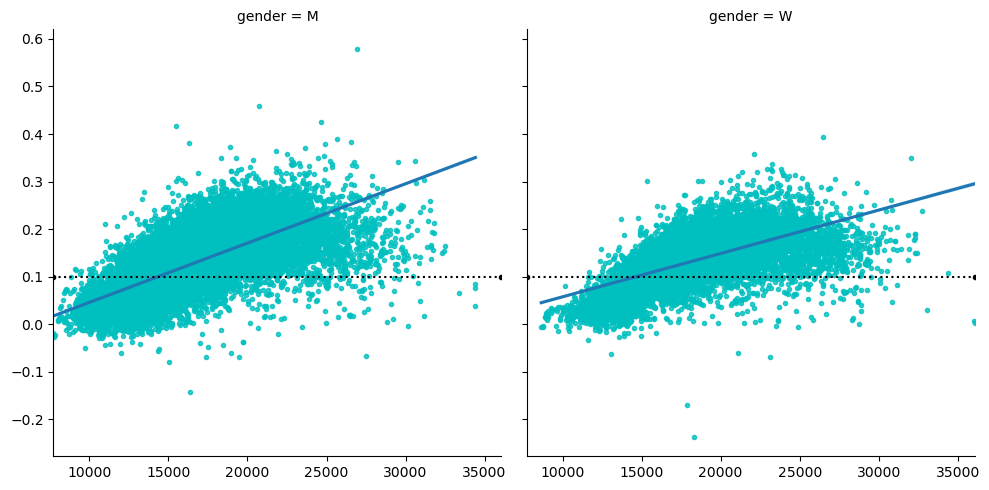

In [24]:
# ¿Hay correlación entre los valores de "split_frac" y el hecho de haber terminado más rápido la carrera 
# (valores más chicos de final_sec)?

g = sns.lmplot(x = 'final_sec', y = 'split_frac', col='gender', data=data,
               markers=".", scatter_kws=dict(color='c'))
g.map(plt.axhline, y=0.1, color="k", ls=":");